<a href="https://colab.research.google.com/github/kittisaktaoma/GO-tools-comparsion/blob/master/GO_tools_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
library(ggplot2)
library(data.table)
library(xlsx)
library(factoextra)
library(dplyr)
library(data.table)
library(corrplot)
library(RColorBrewer)
library(Hmisc)
library(ggrepel)
library(ComplexHeatmap)
#library(moments)
library(devtools)
library(dplyr)
library(ggpubr)



In [53]:
# Make plots wider 
options(repr.plot.width=12, repr.plot.height=8)

#Retreive Data from Github

In [ ]:
df <- fread("https://raw.githubusercontent.com/kittisaktaoma/GO-tools-comparsion/master/res/Enrichment_01.txt")
head(df)

In [27]:
df_01 <- df %>% filter(.,Enrichment == "All (Up vs. Down)")
head(df_01)

GOID,Description,FDR,Database,Type,Genes,Enrichment,Group
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
GO:0007010,cytoskeleton organization,0.894,DAVID,BP,TUBAL3,All (Up vs. Down),EGCG
GO:0007010,cytoskeleton organization,0.894,DAVID,BP,ACTL6B,All (Up vs. Down),EGCG
GO:0007010,cytoskeleton organization,0.894,DAVID,BP,TUBB6,All (Up vs. Down),EGCG
GO:0090090,negative regulation of canonical Wnt signaling pathway,0.885,DAVID,BP,CAV1,All (Up vs. Down),EGCG
GO:0090090,negative regulation of canonical Wnt signaling pathway,0.885,DAVID,BP,PSMC4,All (Up vs. Down),EGCG
GO:0090090,negative regulation of canonical Wnt signaling pathway,0.885,DAVID,BP,PSMA5,All (Up vs. Down),EGCG


#Plot Frequency (Sig and Non. Sig)

In [ ]:
# Plot Frequency
df_01$Condition <- ifelse(df_01$FDR < 0.05,"Significant","Non. Significant")

##Count and Plot

##Count
count <- df_01[,-6] %>% unique() %>% group_by(Database,Group,Type,Condition) %>% dplyr::summarise(count=n()) %>% as.data.frame()
resh <- reshape(count, idvar = c("Database","Group","Condition"), timevar = "Type", direction = "wide")
resh.01 <-resh[order(resh$Group),]
names(resh.01) <- c("GO enrichment tools",
                    "Dataset",
                    "Result",
                    "Biological process",
                    "Cellular component",
                    "Molecular function")

ggtexttable(resh.01, rows = NULL, theme = ttheme("classic"))


In [ ]:
##Plot
ggplot(data=count, aes(x=reorder(Database,count), y=count, fill=Condition)) +
  geom_bar(stat="identity") +
  theme_bw() +
  facet_grid(vars(Type), vars(Group)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(fill = "") +
  xlab("GO Enrichment Tools") +
  ylab("Frequency")


#Plot Frequency of BP, MF, CC between Caffeine and EGCG (Sig. Only)

In [46]:
round_df <- function(df, digits, rf="round") {
  
  if(  missing(df) ){  
    stop("df not set", call. = F) 
  }else if(!is.data.frame(df)){
    stop("df must be a dataframe", call.=F)
  }
  
  if(missing(digits)){
    digits <- 0
  }else if(!is.numeric( digits )){
    stop( "'digits' must be numeric", call.=F)
  }else if(length(digits)!=1){
    stop("length of 'digits' must be 1", call.=F)
  }else if(! digits > -10 | ! digits <= 10){
    stop("'digits' must be a number between -10 and 10", call.=F)
  }
  
  if(!is.character( rf )){
    stop( "'rf' must be character", call.=F)
  }else if(length(rf)!=1){
    stop("Length of 'rf' must be 1", call.=F)
  }else if(! rf %in% c('round', 'ceiling', 'floor', 'trunc', 'signif') ){ 
  stop("'rf' must be equal to 'round', 'ceiling', 'trunc', 'floor' or 'signif' ", call. = F) 
  }
  
  numeric_columns <- sapply(df, class) == 'numeric'
  
  if(rf=="round"){
  
  df[numeric_columns] <-  round(df[numeric_columns], digits)
  
  }else if(rf=="ceiling"){
    
    df[numeric_columns] <-  ceiling(df[numeric_columns])
    
  }else if(rf=="floor"){
    
    df[numeric_columns] <-  floor(df[numeric_columns])
    
  }else if(rf=="trunc"){
    
    df[numeric_columns] <-  ceiling(df[numeric_columns])
    
  }else if(rf=="signif"){
    
    df[numeric_columns] <-  signif(df[numeric_columns], digits)
    
  }
  
  df
}

`summarise()` regrouping output by 'Database', 'Group' (override with `.groups` argument)



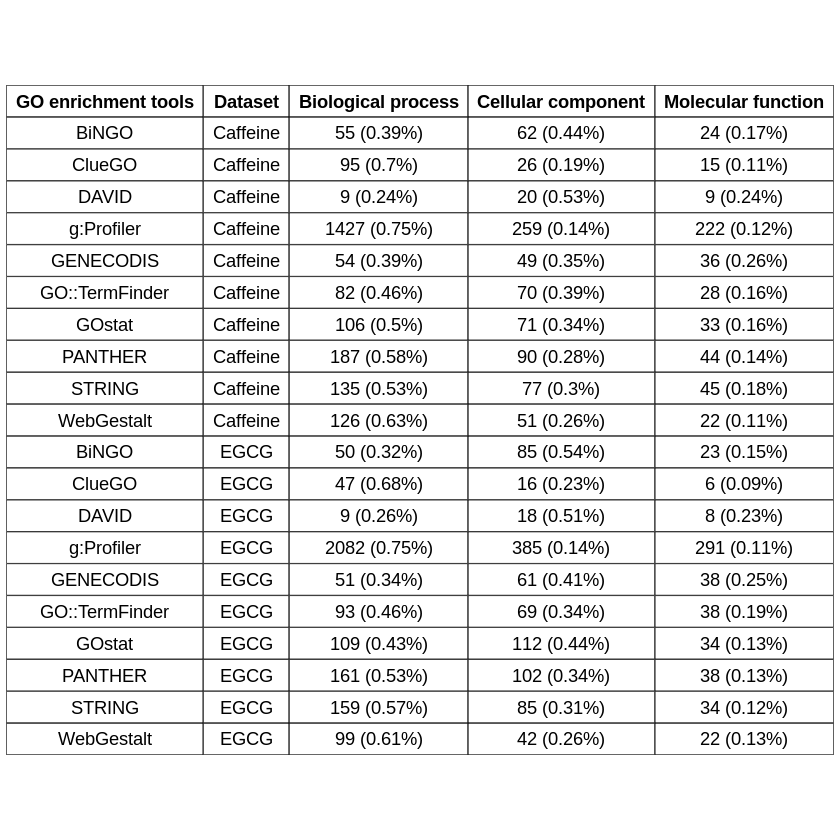

In [48]:
count_02 <-df_01[,-6] %>% unique() %>% filter(.,Condition == "Significant") %>% group_by(Database,Group,Type) %>% dplyr::summarise(count=n()) %>% as.data.frame() 
resh <- reshape(count_02, idvar = c("Database","Group"), timevar = "Type", direction = "wide")
resh.01 <-resh[order(resh$Group),]
names(resh.01) <- c("GO enrichment tools",
                    "Dataset",
                    "Biological process",
                    "Cellular component",
                    "Molecular function")

resh.02 <- cbind(resh.01[,c(1,2)], prop.table(as.matrix(resh.01[,-c(1,2)]), margin = 1))
resh.02[,c(3:5)] <- round_df(resh.02[,c(3:5)], digits=2)

all_non <- cbind(resh.01,resh.02)[,-c(6,7)] 
all_non$`Biological process` <- paste0(all_non$`Biological process`," ","(",all_non$`Biological process.1`,"%",")")
all_non$`Cellular component` <- paste0(all_non$`Cellular component`," ","(",all_non$`Cellular component.1`,"%",")")
all_non$`Molecular function` <- paste0(all_non$`Molecular function`," ","(",all_non$`Molecular function.1`,"%",")")

all_non.final <- all_non[,-c(6,7,8)]
#reshape(all_non.final, idvar = "GO enrichment tools", timevar = "Dataset", direction = "wide")
ggtexttable(all_non.final, rows = NULL, theme = ttheme("classic"))


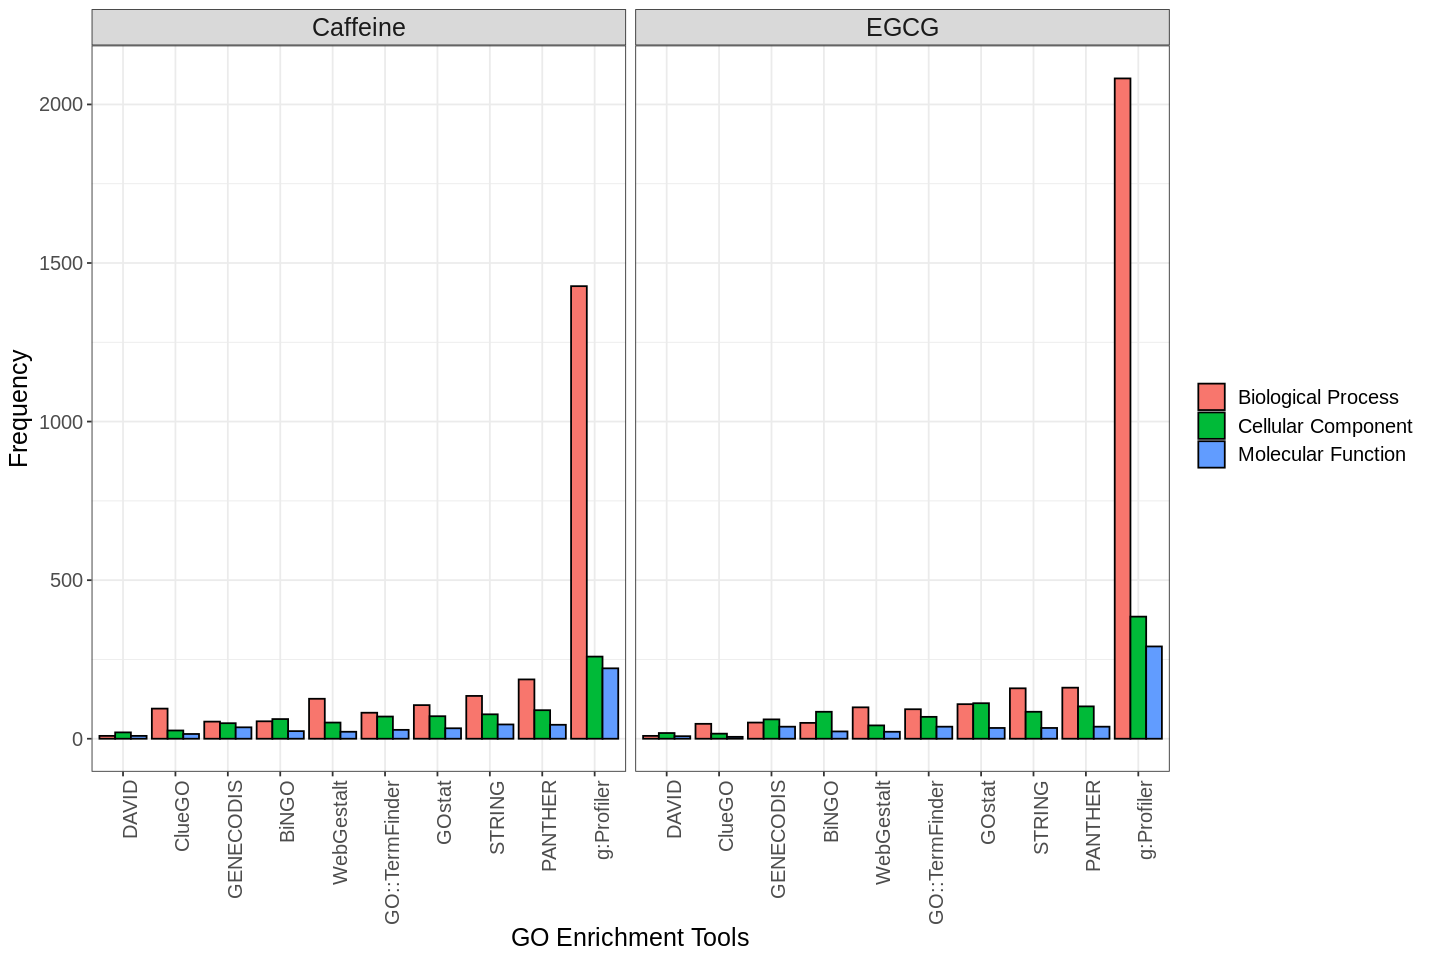

In [54]:

ggplot(data=count_02, aes(x=reorder(Database,count), y=count, fill=Type)) +
  geom_bar(stat="identity", color="black", position=position_dodge()) +
  theme_bw() +
  facet_grid(cols=vars(Group)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(fill = "")+
  xlab("GO Enrichment Tools") +
  ylab("Frequency")+ 
  theme(strip.text.x = element_text(size = 15))+
  theme(text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1)) +
  scale_fill_discrete(name = "", labels = c("Biological Process",
                                                "Cellular Component",
                                                "Molecular Function"))